In [1]:
import numpy as np
from oe_acute import MNE
from oe_acute import trial_utils as tu
import os
import pickle
import glob

In [2]:
import numpy as np
from scipy.io.wavfile import read
from scipy import signal
from scipy.optimize import minimize
import glob
import os
import pickle
from oe_acute import trial_utils as tu
import tqdm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import networkx as nx

In [3]:
exp_path = '/mnt/sphere/share/NCM_acute/experiments/B1240/block3/'
sort_path =  '/mnt/sphere/share/NCM_acute/sorting/B1240/block3/'
stim_path = '/mnt/sphere/share/NCM_acute/MET_prediction_expt/'

ratings = [1,2,3]

ratings_str = ''.join([str(x) for x in ratings])

In [4]:
nperseg=128
noverlap=64
nfft=128
nsegbins=64
bp_low=300
bp_high=12000
bp_order=5
preemph_b=0.97
ref_level_dB=20
min_level_dB=-30

spec_all = []
stereo_all = []
stim_files = glob.glob(os.path.join(stim_path, '*.wav.sine'))
stim_files1 = glob.glob(os.path.join(stim_path, '*.wav'))

In [5]:
n_rows = 0
n_cols = 1
nsegbins = 64

In [6]:
stim_files1[0]

'/mnt/sphere/share/NCM_acute/MET_prediction_expt/4_Z3165_s_09@1___Z3165_s_09@1.wav'

In [7]:
import wave
import contextlib
fname = stim_files1[0]
with contextlib.closing(wave.open(fname,'r')) as f:
    frames = f.getnframes()
    rate = f.getframerate()
    duration = frames / float(rate)
    print(duration)

2.585714285714286


In [8]:
420

420

In [9]:
stim_spec1, stim_resp1 = MNE.prepare_stim_resp_dset(exp_path, sort_path, stim_path, stim_preprocess_func=MNE.preprocess_wav_AVGN, ratings=ratings, avg_nrows=n_rows, avg_ncols=n_cols)

3_E6211_s_13@1___E6211_s_13@1
666
2_A62165_s_62@1___B_G105_s_03_@1
320
3_Y1_G105_s_02_@2___Y1_G105_s_02_@2
217
3_aa_G105_s_08_@2___aa_G105_s_08_@2
495
3_Q6211_s_29@1___Q2211_s_05@2
729
4_R1211_s_16@2___Q6211_s_29@1
805
2_E6165_s_12@2___E6165_s_12@2
355
4_C29165_s_29@1___C29165_s_29@1
686
4_B8165_s_26@1___B6211_s_08@1
834
3_ff1_G105_s_06_@1___ff1_G105_s_06_@1
1137
3_ee_G105_s_05_@2___F2165_s_06@2
620
3_aa_G105_s_08_@2___A62165_s_62@1
478
2_N_G105_s_04_@2___N1211_s_04@1
439
4_O2165_s_18@2___P_G105_s_07_@1
570
rmp5ms_181-15
11271
4_B22165_s_22@2___B12165_s_48@1
369
4_B22211_s_59@1___B22211_s_59@1
1180
4_I1211_s_04@1___I1211_s_04@1
870
5_P2165_s_16@1___P6211_s_52@1
888
4_Z3165_s_09@1___Z3165_s_09@1
420
3_F1211_s_04@2___F1211_s_04@2
686
2_N_G105_s_04_@2___M2165_s_20@1
410
2_B18211_s_58@2___B22165_s_22@2
354
4_R_G105_s_06_@1___R_G105_s_06_@1
657
3_L2_G105_s_01_@1___L6211_s_20@2
731
rmp5ms_G124-1
11110
2_A62165_s_62@1___Z24211_s_24@1
290
1_aa_G105_s_08_@2___B2165_s_03@3
252
2_K_G105_s_05_@1__

In [10]:
np.shape(stim_spec1[0]), np.shape(stim_resp1[0])

((64, 730), (214, 730))

In [11]:
len(stim_spec1), len(stim_resp1)

(60, 60)

### Load stim_spec, stim_resp

In [10]:
#spec_f = '/mnt/cube/srrudrar/stim_preprocess/B1240/temporal_model/stim_spec.pkl'
#with open(spec_f, 'rb') as f:
#    stim_spec = pickle.load(f)

#resp_f = '/mnt/cube/srrudrar/stim_preprocess/temporal_model/stim_resp.pkl'
#with open(resp_f, 'rb') as f:
#    stim_resp = pickle.load(f)

segs_list = np.load('/mnt/cube/srrudrar/stim_preprocess/B1240/segs_list_32.pkl', allow_pickle=True)
next_list = np.load('/mnt/cube/srrudrar/stim_preprocess/B1240/next_list_32.pkl', allow_pickle=True)

In [12]:
stim_resp = segs_list[:,32:,:]

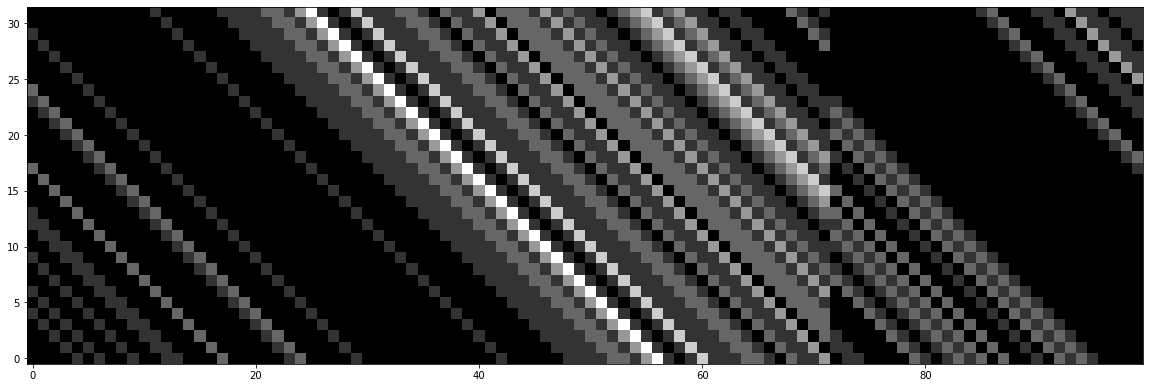

In [14]:
ax = plt.subplots(figsize=(20,8))
plt.imshow(np.transpose(stim_resp[:100, 100, :]), origin='lower', cmap='gray')

In [13]:
np.shape(segs_list), np.shape(next_list), np.shape(stim_resp)

((57063, 246, 32), (57063, 246), (57063, 214, 32))

In [14]:
stim_spec = stim_spec1
stim_resp = stim_resp1

In [15]:
type(stim_spec), type(stim_resp)

(list, list)

In [8]:
#dset_segs = MNE.prepare_AE_dset(stim_spec, stim_resp, nsegbins=nsegbins, thresh=0.01)

In [17]:
dsegs, spec1 = MNE.prepare_temporal_dset(stim_spec1, stim_resp1, nsegbins=nsegbins, thresh=0.01)

Final shape: (114137, 278, 64)
Next shape: (114137, 278)


### Reduce to 16 bins

In [18]:
np.shape(stim_spec1[0]), np.shape(stim_resp1[0])

((64, 730), (214, 730))

In [19]:
stim_spec_32 = []
for stim in stim_spec:
    stim_32 = MNE.kozlov_averaging(stim, n_rows=1, n_cols=0)
    stim_spec_32.append(stim_32)

In [20]:
nsegbins1 = 32

In [21]:
dsegs_32, spec1_32 = MNE.prepare_temporal_dset(stim_spec_32, stim_resp1, nsegbins=nsegbins1, thresh=0.01)

Final shape: (108570, 246, 32)
Next shape: (108570, 246)


In [22]:
bird = 'B1240'

In [24]:
spec_segs_name = '/mnt/cube/srrudrar/stim_preprocess/{}/segs_list_{}_32_part1.pkl'.format(bird,bird)
with open(spec_segs_name, 'wb') as f:
    pickle.dump(dsegs_32[:50000,:,:], f)
    
spec_segs_name = '/mnt/cube/srrudrar/stim_preprocess/{}/segs_list_{}_32_part2.pkl'.format(bird,bird)
with open(spec_segs_name, 'wb') as f:
    pickle.dump(dsegs_32[50000:,:,:], f)

In [25]:
spec_next_name = '/mnt/cube/srrudrar/stim_preprocess/{}/next_list_{}_32.pkl'.format(bird,bird)
with open(spec_next_name, 'wb') as f:
    pickle.dump(spec1_32, f)